# Calcolo della Distribuzione a Posteriori Gaussiana tramite Metodo a Griglia {#sec-grid-gauss}

![](../../figures/art_26.png){ width=40% } 

**Prerequisiti**

**Concetti e Competenze Chiave**

**Preparazione del Notebook**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import arviz as az

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
sns.set_theme(palette="colorblind")
az.style.use("arviz-darkgrid")

## Introduzione {.unnumbered}

Lo scopo di questo capitolo è estendere la discussione precedente sul calcolo della distribuzione a posteriori utilizzando la verosimiglianza gaussiana, introducendo il metodo basato sulla griglia.

## Un prior uniforme

Consideriamo il caso in cui abbiamo un campione di 10 osservazioni. Questo campione è generato mediante il campionamento casuale da una Normale di media 50 e deviazione standard pari a 5. Nella simulazione successiva considereremo $\sigma$ nota.

In [3]:
np.random.seed(RANDOM_SEED)  # Per la riproducibilità
vera_media = 50  # Media vera
sigma_conosciuta = 5  # Deviazione standard conosciuta
dimensione_campione = 10  # Dimensione del campione

# Generare un campione
campione = np.random.normal(loc=vera_media, scale=sigma_conosciuta, size=dimensione_campione)
print(campione)

[48.54283933 43.64834594 54.59899393 61.47236626 48.30510499 43.11175964
 60.88971922 39.33729382 52.25731836 50.64725801]


Creiamo ora una griglia di 100 elementi con valori compresi tra 40 e 60.

In [11]:
media_griglia = np.linspace(start=40, stop=60, num=100)  # 100 punti tra 40 e 60
print(media_griglia)

[40.         40.2020202  40.4040404  40.60606061 40.80808081 41.01010101
 41.21212121 41.41414141 41.61616162 41.81818182 42.02020202 42.22222222
 42.42424242 42.62626263 42.82828283 43.03030303 43.23232323 43.43434343
 43.63636364 43.83838384 44.04040404 44.24242424 44.44444444 44.64646465
 44.84848485 45.05050505 45.25252525 45.45454545 45.65656566 45.85858586
 46.06060606 46.26262626 46.46464646 46.66666667 46.86868687 47.07070707
 47.27272727 47.47474747 47.67676768 47.87878788 48.08080808 48.28282828
 48.48484848 48.68686869 48.88888889 49.09090909 49.29292929 49.49494949
 49.6969697  49.8989899  50.1010101  50.3030303  50.50505051 50.70707071
 50.90909091 51.11111111 51.31313131 51.51515152 51.71717172 51.91919192
 52.12121212 52.32323232 52.52525253 52.72727273 52.92929293 53.13131313
 53.33333333 53.53535354 53.73737374 53.93939394 54.14141414 54.34343434
 54.54545455 54.74747475 54.94949495 55.15151515 55.35353535 55.55555556
 55.75757576 55.95959596 56.16161616 56.36363636 56

Calcoliamo la likelihood.

In [12]:
likelihood = np.array([np.prod(stats.norm.pdf(campione, loc=media, scale=sigma_conosciuta)) for media in media_griglia])
likelihood

array([4.43497974e-25, 1.00961743e-24, 2.26116493e-24, 4.98216199e-24,
       1.07997486e-23, 2.30313636e-23, 4.83209939e-23, 9.97383700e-23,
       2.02534436e-22, 4.04618453e-22, 7.95248204e-22, 1.53769396e-21,
       2.92514449e-21, 5.47437998e-21, 1.00793553e-20, 1.82574775e-20,
       3.25356129e-20, 5.70410371e-20, 9.83843533e-20, 1.66945554e-19,
       2.78698020e-19, 4.57723393e-19, 7.39575534e-19, 1.17563407e-18,
       1.83853539e-18, 2.82866831e-18, 4.28156219e-18, 6.37577071e-18,
       9.34056882e-18, 1.34624518e-17, 1.90890888e-17, 2.66290968e-17,
       3.65458340e-17, 4.93434508e-17, 6.55437614e-17, 8.56531629e-17,
       1.10119860e-16, 1.39282995e-16, 1.73316833e-16, 2.12174698e-16,
       2.55538678e-16, 3.02781890e-16, 3.52950131e-16, 4.04768775e-16,
       4.56678807e-16, 5.06903062e-16, 5.53540208e-16, 5.94680409e-16,
       6.28533301e-16, 6.53556524e-16, 6.68572052e-16, 6.72858096e-16,
       6.66206627e-16, 6.48940106e-16, 6.21885576e-16, 5.86308990e-16,
      

La likelihood rappresenta quanto sono verosimili i dati osservati dato un certo parametro (o set di parametri) del modello. Nel contesto della distribuzione gaussiana, la likelihood di un insieme di osservazioni dato un valore specifico della media ($\mu$) e conoscendo la deviazione standard ($\sigma$) si calcola come il prodotto delle densità di probabilità di ogni osservazione data quella media e deviazione standard. Questo approccio si basa sull'assunzione di indipendenza tra le osservazioni.

Il codice precedente calcola la likelihood per una serie di valori possibili della media ($\mu$), mantenendo la deviazione standard ($\sigma$) come un valore noto e fisso. Ecco come funziona passo dopo passo:

```python
likelihood = np.array([np.prod(norm.pdf(campione, loc=media, scale=sigma_conosciuta)) for media in media_griglia])
```

1. **`norm.pdf(campione, loc=media, scale=sigma_conosciuta)`:** Per ogni valore di `media` nella griglia specificata (`media_griglia`), questa espressione calcola la densità di probabilità (PDF) della distribuzione normale per ciascun punto nel campione (`campione`). `loc=media` specifica il valore medio della distribuzione normale considerata in quel momento, mentre `scale=sigma_conosciuta` indica la deviazione standard della distribuzione, che è considerata nota e costante per tutti i calcoli. Il risultato di `norm.pdf` per ogni valore di `media` è un array che contiene le probabilità di ogni osservazione del campione date quella media e la deviazione standard conosciuta.
2. **`np.prod(...)`:** Calcola il prodotto degli elementi nell'array restituito da `norm.pdf`, ovvero moltiplica tra loro le probabilità di tutte le osservazioni del campione per il valore corrente di `media`. Questo prodotto rappresenta la likelihood complessiva del campione dato quel valore specifico della media, assumendo che le osservazioni siano indipendenti. Il concetto di indipendenza è cruciale qui perché ci permette di moltiplicare le probabilità delle singole osservazioni per ottenere la probabilità complessiva (likelihood) del set di dati.
3. **Comprehension list `[...] for media in media_griglia`:** Questa parte del codice esegue il calcolo della likelihood per ogni valore di `media` nella griglia e salva i risultati in un array NumPy. Quindi, per ciascun valore possibile della media considerata, calcoliamo quanto il campione osservato sia verosimile, data quella media e la deviazione standard nota.

Il risultato finale, `likelihood`, è un array dove ogni elemento corrisponde alla likelihood del campione di dati osservati per un specifico valore della media sulla griglia. 

Per fare un esempio, consideriamo il primo punto della griglia, corrispondente ad una una media di $40$ (dato che `media_griglia` è definita da 40 a 60). Calcoliamo la densità di probabilità (PDF) per ogni osservazione nel campione dato questo valore della media ($40$) e una deviazione standard conosciuta di $5$. Ecco le PDF per ciascuna osservazione nel campione:

```plaintext
[2.28493333e-02, 4.62542534e-02, 3.31420922e-02, 3.00464741e-02,
 1.11418804e-05, 1.96649746e-02, 2.18282203e-02, 2.11292630e-02,
 4.05476440e-03, 1.40537162e-07]
```

Questi valori rappresentano la densità di probabilità di osservare ciascuna misurazione data una distribuzione normale con media $40$ e deviazione standard $5$. La likelihood del campione dato questo valore della media è calcolata come il prodotto di queste densità di probabilità, risultando in $6.060521630996206 \times 10^{-26}$.

Questo numero molto piccolo riflette il fatto che, dato un valore medio di $40$, la probabilità complessiva di osservare questo specifico campione è estremamente bassa. 

Per costruire la likelihood completa, ripetiamo questa procedura per ogni punto della nostra griglia di valori.

Dopo aver calcolato la likelihood per ogni punto, procediamo moltiplicandola per il valore del prior corrispondente. Questo passaggio ci consente di ottenere una distribuzione a posteriori non ancora normalizzata.

Nel contesto di una griglia discreta, la normalizzazione della distribuzione a posteriori può essere facilmente conseguita dividendo ogni valore per la somma totale dei valori della distribuzione a posteriori.

In [13]:
prior = np.ones(len(media_griglia))  # Una prior uniforme
posterior_non_norm = likelihood * prior  # Calcoliamo la posterior non normalizzata moltiplicando per la prior
posterior = posterior_non_norm / np.sum(posterior_non_norm)  # Normalizziamo la posterior

La figura successiva presenta una rappresentazione grafica della distribuzione a posteriori normalizzata.

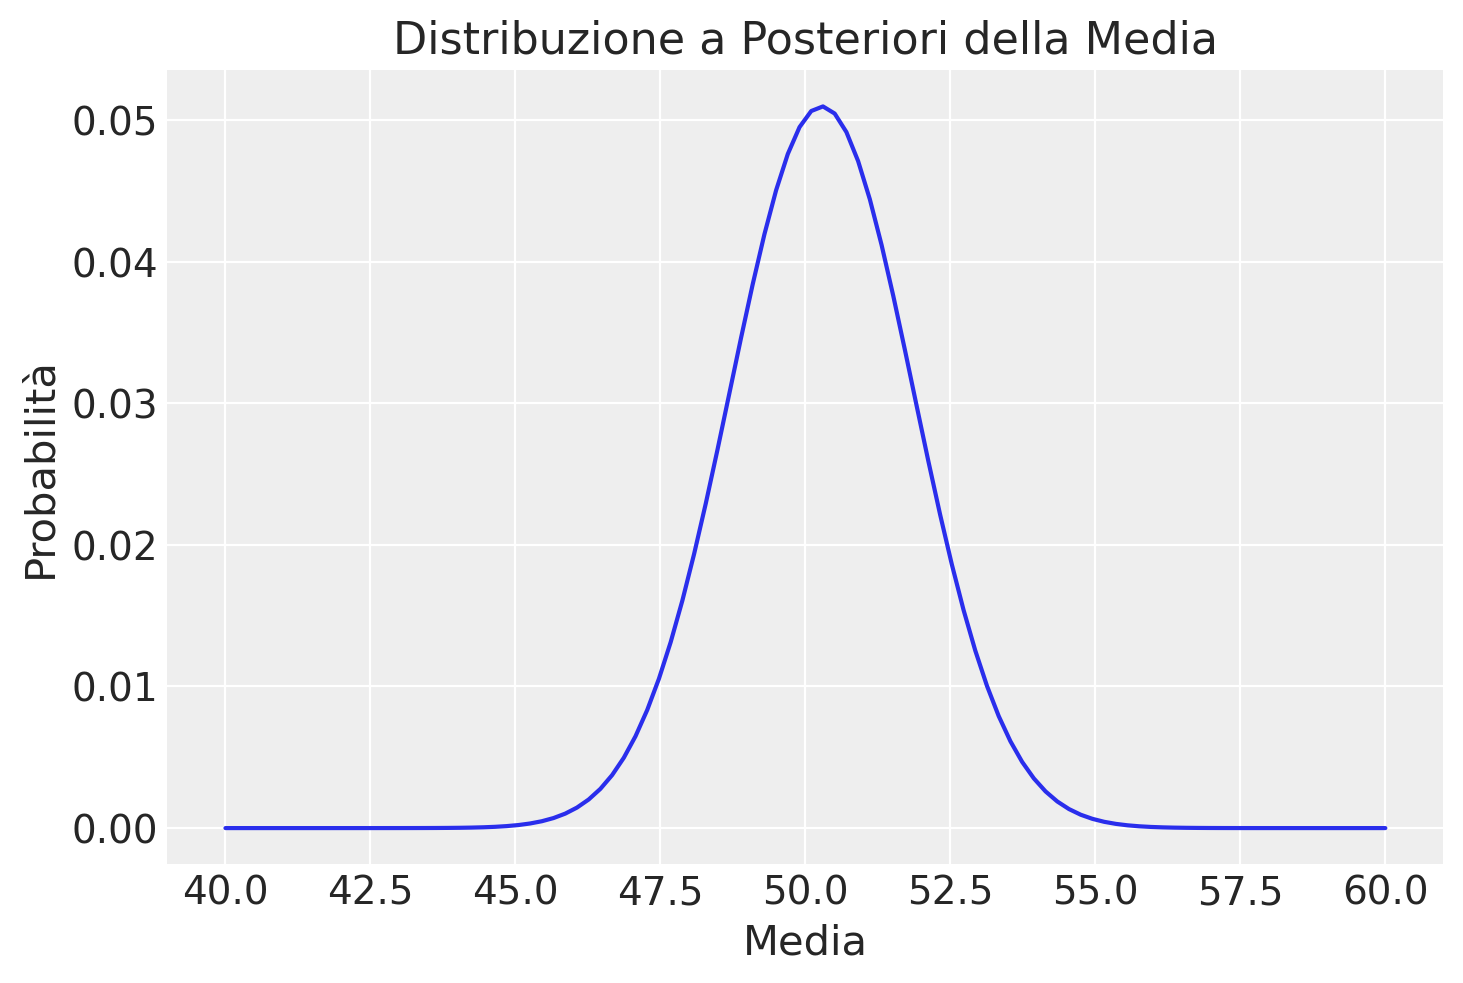

In [14]:
plt.plot(media_griglia, posterior)
plt.title('Distribuzione a Posteriori della Media')
plt.xlabel('Media')
plt.ylabel('Probabilità')
plt.show()

Per fare un altro esempio, consideriamo un prior non uniforme corrispondente ad una distribuzione gaussiana con media 40 e $\sigma$ = 3.

In [15]:
# Calcolo della prior gaussiana per ogni valore della griglia della media
prior = stats.norm.pdf(media_griglia, loc=40, scale=3)

# Calcolo della likelihood (rimane invariato)
likelihood = np.array([np.prod(stats.norm.pdf(campione, loc=media, scale=sigma_conosciuta)) for media in media_griglia])

# Calcolo della distribuzione a posteriori (aggiornamento con la nuova prior)
posterior_non_norm = likelihood * prior  # Moltiplicazione element-wise
posterior = posterior_non_norm / np.sum(posterior_non_norm)  # Normalizzazione

Riesaminiamo la distribuzione a posteriori calcolata in questo caso, confrontandola con la distribuzione a priori. È importante notare che, in questo secondo esempio, la distribuzione a posteriori mostra una "traslazione" in direzione del prior.

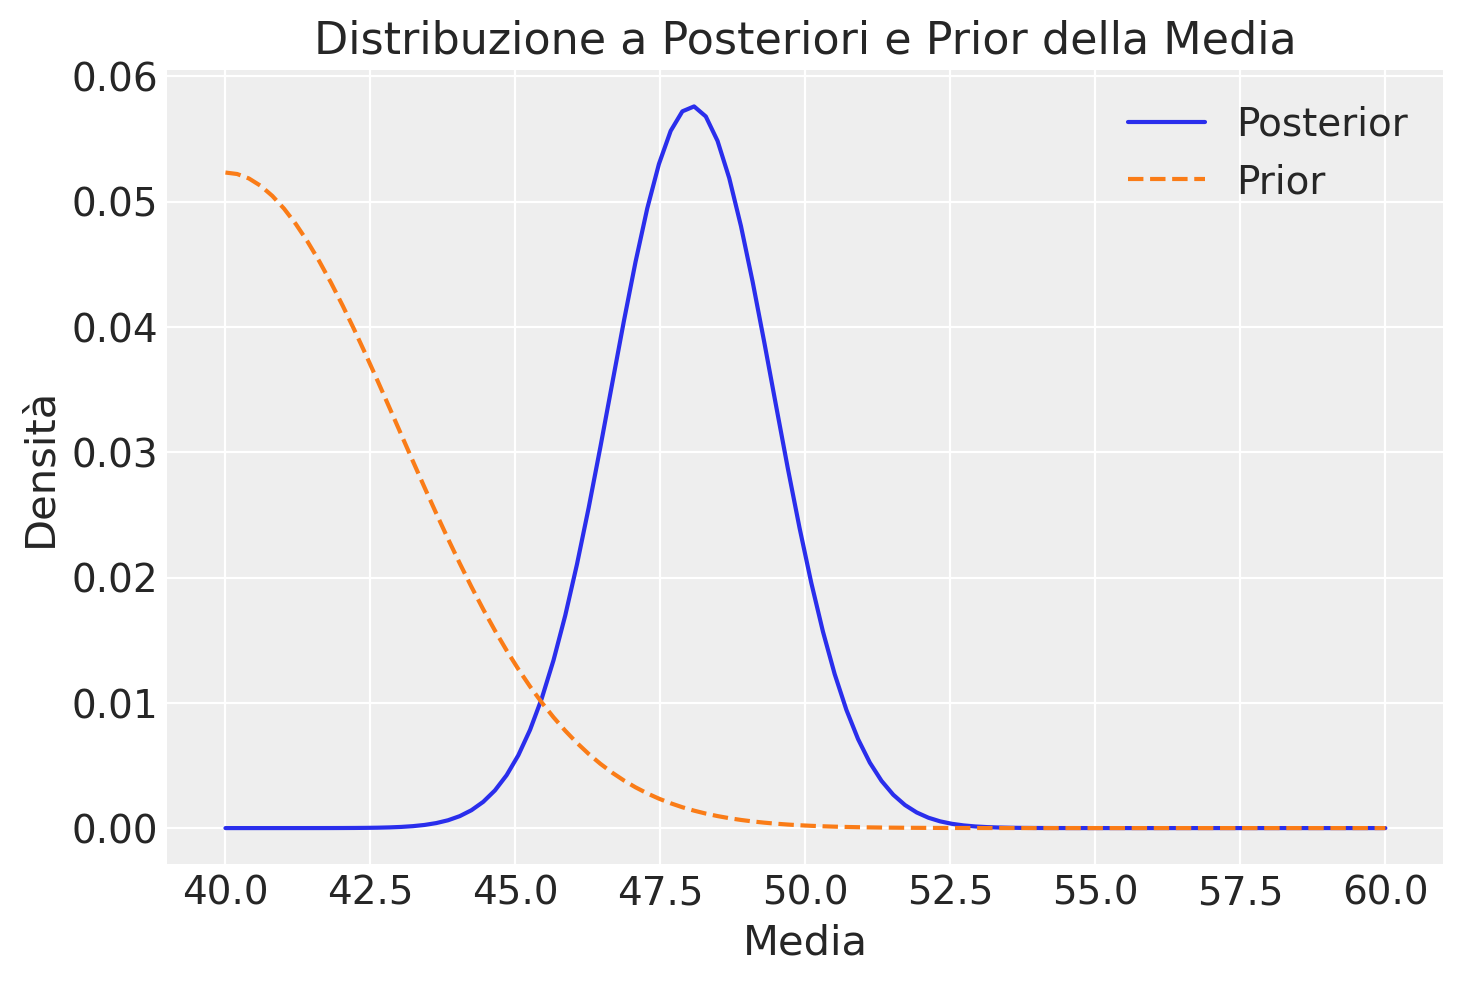

In [16]:
plt.plot(media_griglia, posterior, label='Posterior')
plt.plot(media_griglia, prior / np.sum(prior), label='Prior', linestyle='--')
plt.title('Distribuzione a Posteriori e Prior della Media')
plt.xlabel('Media')
plt.ylabel('Densità')
plt.legend()
plt.show()

Dopo aver calcolato la distribuzione a posteriori come mostrato sopra, per ottenere un campione casuale da questa distribuzione possiamo seguire un approccio di campionamento discreto. Poiché la distribuzione a posteriori è definita su una griglia di valori della media, possiamo utilizzare il campionamento ponderato per selezionare casualmente un valore dalla griglia secondo le probabilità a posteriori.

Questo metodo ci permette di "campionare" dalla distribuzione a posteriori nonostante essa sia rappresentata in forma discreta anziché continua. Ecco come si può fare in Python:

In [17]:
# Selezione casuale di un indice dalla griglia secondo le probabilità a posteriori
indice_campionato = np.random.choice(a=len(media_griglia), size=1000, p=posterior)

# Estrazione del valore della media corrispondente all'indice campionato
media_campionata = media_griglia[indice_campionato]
media_campionata.shape

(1000,)

Il metodo `np.random.choice` permette di selezionare un indice dalla griglia con probabilità proporzionale ai valori della distribuzione a posteriori. In questo modo, i valori della media con probabilità a posteriori più alta saranno selezionati più frequentemente, riflettendo la loro maggiore plausibilità data la combinazione dei dati osservati e della prior.

Questo campione dalla distribuzione a posteriori rappresenta quindi una possibile stima della media della popolazione, tenendo conto sia dei dati osservati (attraverso la likelihood) sia delle nostre conoscenze o supposizioni precedenti (attraverso la prior).

L'istogramma seguente mostra la distribuzione di un campione casuale ottenuto dalla distribuzione a posteriori.

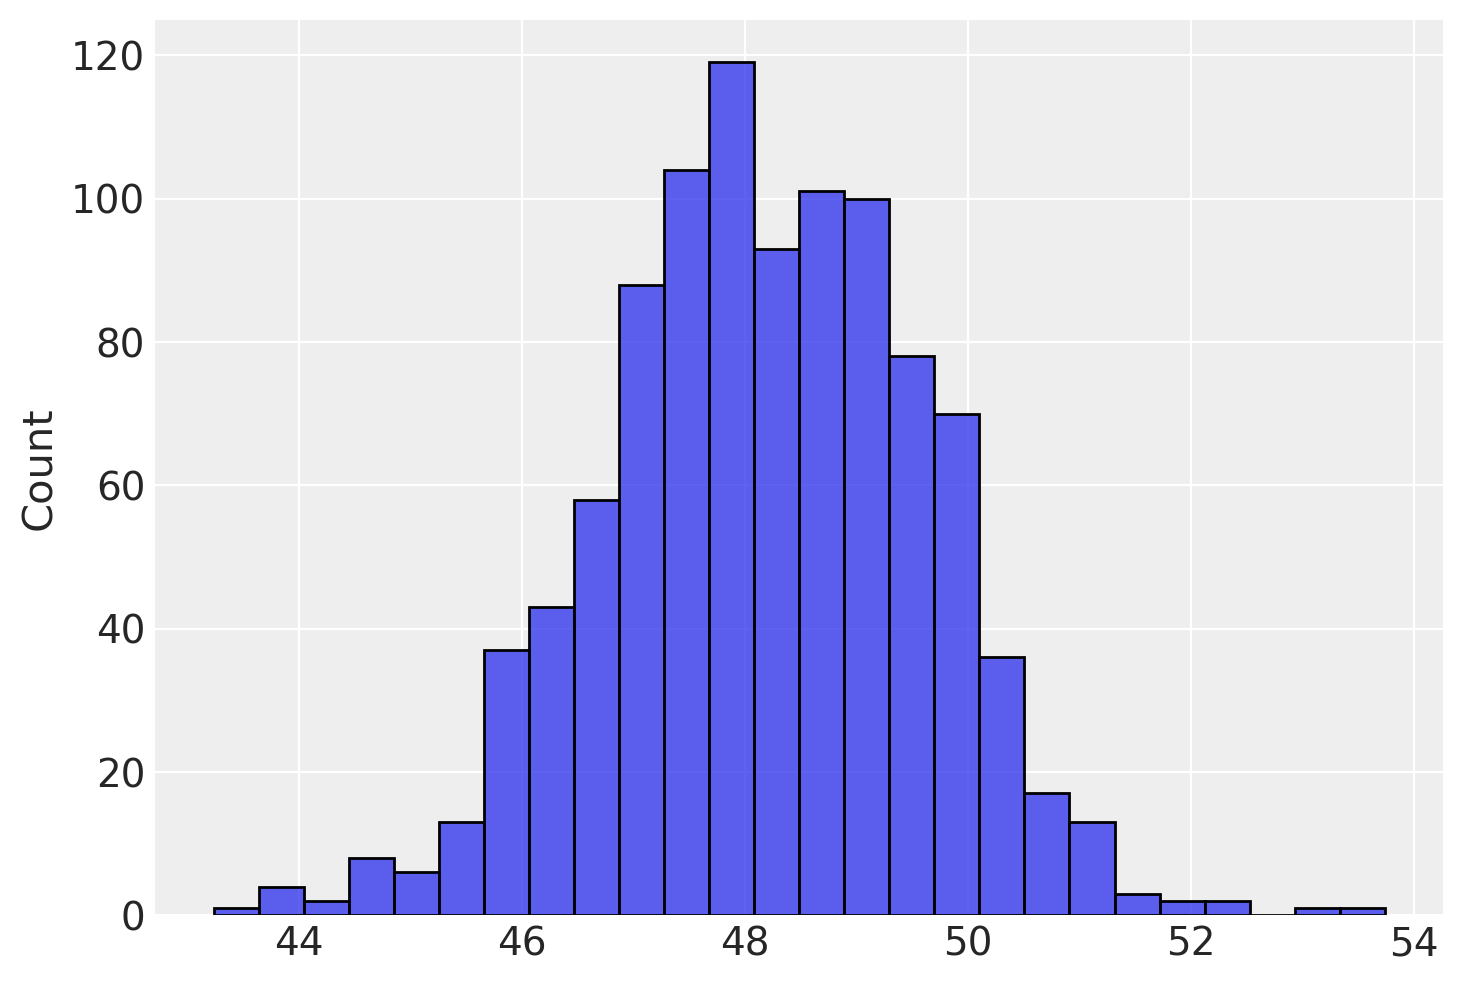

In [18]:
_ = sns.histplot(media_campionata)

Calcoliamo ora la media a posteriori:

In [19]:
np.mean(media_campionata)

48.07676767676767

L'intervallo di credibilità al 94% è dato da:

In [20]:
# Calcolo del 3° e 97° percentile dei campioni per ottenere l'intervallo di credibilità al 95%
limite_inferiore = np.percentile(media_campionata, 3)
limite_superiore = np.percentile(media_campionata, 97)

print(f"Intervallo di credibilità al 94% per la media: [{limite_inferiore}, {limite_superiore}]")

Intervallo di credibilità al 94% per la media: [45.45454545454545, 50.511111111111106]


L'intervallo di credibilità al 94%, calcolato come descritto sopra, rappresenta un intervallo all'interno del quale ci aspettiamo che si trovi il vero valore della media della popolazione con una probabilità del 94%. In altre parole, basandoci sulle informazioni ottenute dai campioni e su precedenti conoscenze rappresentate dalla distribuzione a priori, possiamo essere il 94% confidenti che l'intervallo definito dal 3° al 97° percentile includa la vera media della popolazione.

L'intervallo di credibilità che è stato calcolato offre una stima probabilitica di dove si trova il vero valore della media della popolazione, basandosi sui dati del campione e sull'approccio inferenziale bayesiano. Questo intervallo fornisce quindi una misura diretta dell'incertezza della nostra stima, riflettendo la forza e la precisione delle evidenze a nostra disposizione.

## La Log-Verosimiglianza

Nell'esempio presente abbiamo calcolato la verosimiglianza con una somma. Tuttavia questo produce dei problemi e, in generale, è preferibile lavorare con i logaritmi.

**Stabilità Numerica** I prodotti di molte probabilità piccole possono portare a un "underflow" numerico, dove il valore risultante è così piccolo che viene arrotondato a zero dalla rappresentazione in virgola mobile del computer. I logaritmi trasformano questi prodotti in somme, riducendo significativamente il rischio di underflow.

**Semplificazione dei Calcoli** Il logaritmo di un prodotto è uguale alla somma dei logaritmi (log(ab) = log(a) + log(b)). Questo trasforma il prodotto di molte verosimiglianze in una somma di logaritmi, semplificando i calcoli e migliorando l'efficienza computazionale.

**Miglioramento della Precisione** I calcolatori sono generalmente più precisi nel sommare che nel moltiplicare numeri, specialmente quando si tratta di numeri molto grandi o molto piccoli. L'uso dei logaritmi può quindi aiutare a mantenere una maggiore precisione nei calcoli.

**Facilità di Ottimizzazione** Molti algoritmi di ottimizzazione lavorano meglio con somme piuttosto che con prodotti, soprattutto perché le derivate delle funzioni somma sono più semplici da calcolare rispetto a quelle dei prodotti. Questo è particolarmente utile nella stima di massima verosimiglianza e in altri contesti di ottimizzazione bayesiana.

**Gestione di Valori Estremi** I logaritmi possono aiutare a gestire meglio un ampio range di valori, riducendo gli effetti di valori estremamente grandi o piccoli che potrebbero altrimenti dominare il prodotto di verosimiglianze e portare a risultati distorti.

In conclusione, l'uso dei logaritmi nella stima delle distribuzioni posteriori e in altri calcoli probabilistici offre numerosi vantaggi in termini di stabilità numerica, precisione e efficienza computazionale, rendendolo un approccio preferibile in molte situazioni.

Per riprodurre l'esempio precedente utilizzando la log-verosimiglianza, anziché lavorare direttamente con i valori delle verosimiglianze, convertiremo i calcoli in termini di logaritmi. Questo approccio migliora la stabilità numerica e l'efficienza dei calcoli, come discusso precedentemente. Seguiamo il processo passo dopo passo:

1. **Generazione del Campione**: Iniziamo generando un campione dalla distribuzione normale con una media vera e una deviazione standard conosciuta.
2. **Definizione della Griglia per la Media**: Stabiliremo una griglia di valori possibili per la media sulla quale calcoleremo la log-verosimiglianza.
3. **Calcolo della Log-Likelihood**: Calcoleremo la log-verosimiglianza per ciascun valore della griglia, utilizzando la densità di probabilità normale.
4. **Applicazione della Prior e Calcolo della Posterior**: Moltiplicheremo la log-verosimiglianza per la log-prior (se applicabile) e normalizzeremo per ottenere la distribuzione a posteriori.
5. **Visualizzazione**: Infine, visualizzeremo la distribuzione a posteriori della media.

Procediamo con l'implementazione in Python:

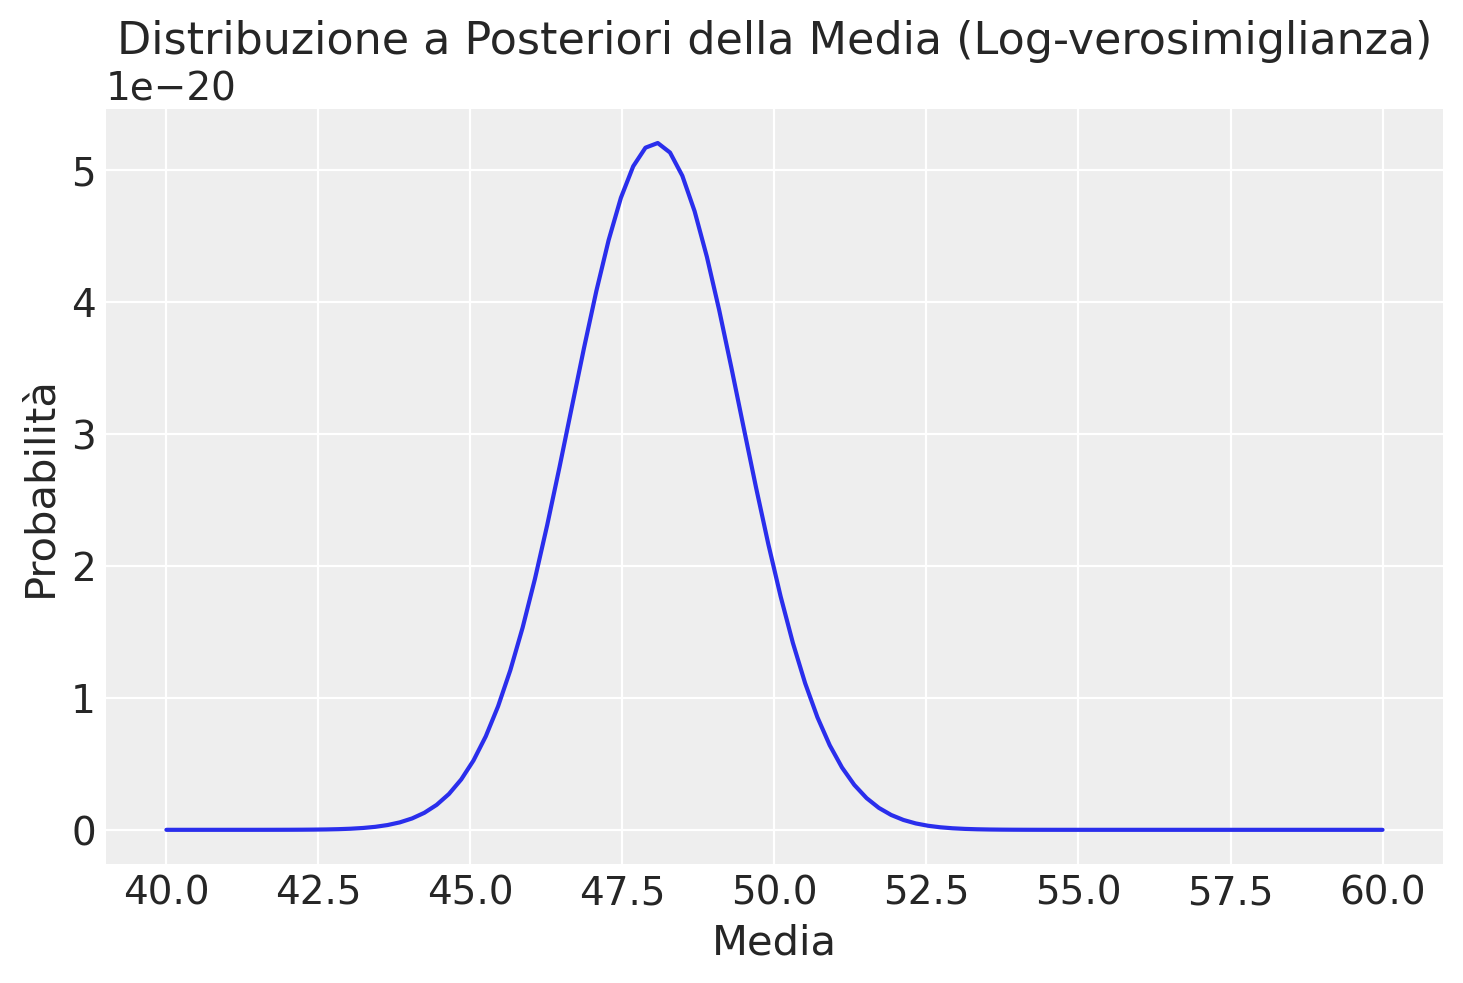

In [24]:
np.random.seed(RANDOM_SEED)  # Per la riproducibilità
vera_media = 50  # Media vera
sigma_conosciuta = 5  # Deviazione standard conosciuta
dimensione_campione = 10  # Dimensione del campione

# Generare un campione
campione = np.random.normal(loc=vera_media, scale=sigma_conosciuta, size=dimensione_campione)

# Definizione della griglia per la media
media_griglia = np.linspace(start=40, stop=60, num=100)  

# Calcolo della log-likelihood
log_likelihood = np.array([np.sum(stats.norm.logpdf(campione, loc=media, scale=sigma_conosciuta)) for media in media_griglia])

# Calcoliamo la log-prior gaussiana
log_prior = stats.norm.logpdf(media_griglia, loc=40, scale=3)

# Calcoliamo la log-posterior non normalizzata sommando log-likelihood e log-prior
log_posterior_non_norm = log_likelihood + log_prior  

# Normalizziamo la log-posterior
log_posterior = log_posterior_non_norm - np.log(np.sum(np.exp(log_posterior_non_norm - np.max(log_posterior_non_norm))))
posterior = np.exp(log_posterior)

# Visualizzazione della distribuzione a posteriori
plt.plot(media_griglia, posterior)
plt.title('Distribuzione a Posteriori della Media (Log-verosimiglianza)')
plt.xlabel('Media')
plt.ylabel('Probabilità')
plt.show()

## Deviazione Standard Ignota

Estendere l'approccio usato sopra al caso in cui la deviazione standard ($\sigma$) della popolazione non è conosciuta introduce una complessità maggiore nell'inferenza bayesiana, poiché ora dobbiamo stimare due parametri (la media e la deviazione standard) invece di uno solo. In questo contesto, la distribuzione a posteriori diventa una funzione delle due dimensioni (media e $\sigma$), e la sua esplorazione richiede metodi più sofisticati per navigare efficacemente lo spazio dei parametri. Vediamo come affrontare questo problema:

### 1. **Definizione dello Spazio dei Parametri**

Dobbiamo definire una griglia bidimensionale che copra le possibili combinazioni di valori per la media ($\mu$) e la deviazione standard ($\sigma$). Questo approccio, sebbene computazionalmente intensivo, è fattibile per problemi di dimensioni moderate.

In [25]:
mu_griglia = np.linspace(start=40, stop=60, num=100)
sigma_griglia = np.linspace(start=1, stop=10, num=50)

### 2. **Calcolo della Log-Likelihood Bidimensionale**

Per ogni coppia di valori ($\mu$, $\sigma$) nella griglia, calcoliamo la log-likelihood del campione. Questo richiede un'iterazione su entrambe le dimensioni della griglia.

In [26]:
log_likelihood_2d = np.array([[np.sum(stats.norm.logpdf(campione, loc=mu, scale=sigma))
                                for sigma in sigma_griglia] for mu in mu_griglia])

### 3. **Applicazione delle Priors**

Le priors per $\mu$ e $\sigma$ possono essere definite in modo indipendente e poi combinate, o si può definire una prior congiunta che rifletta la conoscenza o le assunzioni sui parametri. Le log-priors per $\mu$ e $\sigma$ sono calcolate su ogni griglia rispettivamente e poi sommate per ottenere una log-prior congiunta.

In [27]:
log_prior_mu = stats.norm.logpdf(mu_griglia, loc=40, scale=5)
log_prior_sigma = stats.norm.logpdf(sigma_griglia, loc=5, scale=2)
log_prior_2d = log_prior_mu[:, np.newaxis] + log_prior_sigma

### 4. **Calcolo della Distribuzione a Posteriori Bidimensionale**

Sommando la log-likelihood con la log-prior congiunta e normalizzando, otteniamo la distribuzione a posteriori bidimensionale.

In [28]:
log_posterior_2d = log_likelihood_2d + log_prior_2d
log_posterior_2d -= np.max(log_posterior_2d)  # Stabilizzazione
posterior_2d = np.exp(log_posterior_2d)
posterior_2d /= np.sum(posterior_2d)

### 5. **Visualizzazione**

La visualizzazione di distribuzioni bidimensionali può essere effettuata tramite contour plot o heatmaps.


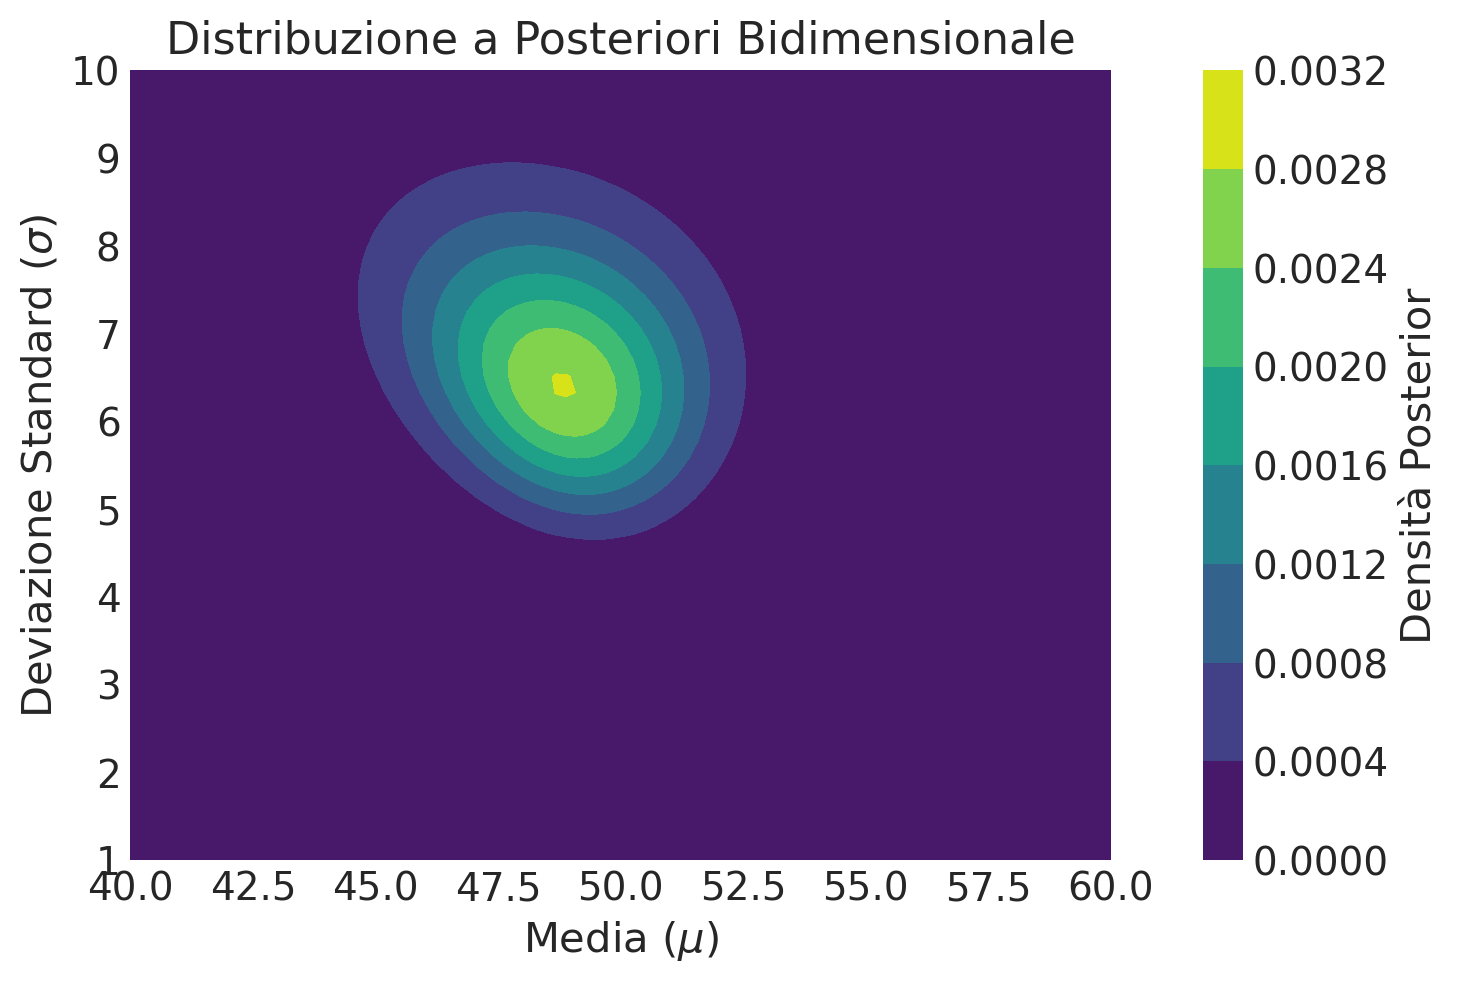

In [29]:
plt.contourf(mu_griglia, sigma_griglia, posterior_2d.T)
plt.xlabel('Media ($\mu$)')
plt.ylabel('Deviazione Standard ($\sigma$)')
plt.colorbar(label='Densità Posterior')
plt.title('Distribuzione a Posteriori Bidimensionale')
plt.show()

## Conclusione e Riflessioni Finali

Questo approccio richiede di navigare un numero molto maggiore di combinazioni di parametri rispetto alla stima di un solo parametro, rendendo l'analisi più computazionalmente intensiva. Inoltre, la scelta delle priors per più parametri richiede attenzione, poiché influenzerà direttamente le stime a posteriori.

Per problemi con più dimensioni o quando l'esplorazione della griglia diventa impraticabile, metodi come il campionamento di Markov Chain Monte Carlo (MCMC) diventano essenziali. Questi metodi permettono di campionare efficacemente dalla distribuzione a posteriori senza dover esplorare esplicitamente tutto lo spazio dei parametri.

In sintesi, l'estensione dell'approccio bayesiano a casi in cui più parametri sono sconosciuti richiede una maggiore attenzione nella definizione dello spazio dei parametri, nella scelta delle priors, e nel calcolo delle distribuzioni a posteriori

## Informazioni sull'Ambiente di Sviluppo {.unnumbered}

In [30]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Wed Mar 20 2024

Python implementation: CPython
Python version       : 3.11.8
IPython version      : 8.22.2

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

arviz     : 0.17.1
seaborn   : 0.13.2
scipy     : 1.12.0
pandas    : 2.2.1
matplotlib: 3.8.3
numpy     : 1.26.4

Watermark: 2.4.3

